<a href="https://colab.research.google.com/github/pedro-pauletti/computacao-inspirada-pela-natureza/blob/main/Trabalho_1_Implementa%C3%A7%C3%A3o_Algoritmos_Gen%C3%A9ticos_Pedro_Pauletti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Algoritmo Genético para reconhecinento de padrões



Implemente um Algoritmo Genético para o exemplo de reconhecimento de padrões apresentado em aula. Em vez de reconhecer o número 1 seu algoritmo deve reconhecer o número 0, representado pela bitstring [1 1 1 1 0 1 1 0 1 1 1 1]. Verifique quantas gerações são necessárias em média para atingir o alvo. Teste diferentes taxas de crossover e mutação e compare os resultados. Faça experimentos apenas com crossover e apenas com mutação e compare também os resultados.

### Bibliotecas utilizadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Função para gerar a população inicial
def generate_initial_population(random=True):
  if random == True:
    return np.random.randint(2, size=(N_INDIVIDUALS, GENOME_LENGTH))
  else:
    fixed_population = np.array([
        [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
    ])
    return fixed_population

### Avaliação

In [ ]:
# Função de avaliação de aptidão
def calculate_fitness(population):
    return GENOME_LENGTH - np.sum(np.abs(population - TARGET), axis=1)

### Seleção

In [ ]:
# Função de seleção por roleta
def roulette_selection(fitness):
    total_fitness = np.sum(fitness)
    probabilities = (fitness / total_fitness) * 360
    return np.random.choice(np.arange(N_INDIVIDUALS), p=probabilities / np.sum(probabilities))


### Operadores Genéticos

##### Crossover

In [ ]:
# Função de crossover
def crossover(parent1, parent2, PC):
    if np.random.rand() <= PC:
        cp = np.random.randint(1, GENOME_LENGTH)  # Ponto de crossover
        child1 = np.concatenate([parent1[:cp], parent2[cp:]])
        child2 = np.concatenate([parent2[:cp], parent1[cp:]])
        return child1, child2
    return parent1, parent2

##### Mutação

In [ ]:
# Função de mutação
def mutation(individual, PM):
    for i in range(GENOME_LENGTH):
        if np.random.rand() <= PM:
            individual[i] = 1 - individual[i]
    return individual

### Reprodução

In [ ]:
# Função para rodar uma geração
def run_generation(population, PC, PM):
    fitness = calculate_fitness(population)
    new_population = []
    for _ in range(N_INDIVIDUALS // 2):
        idx1, idx2 = roulette_selection(fitness), roulette_selection(fitness)
        offspring1, offspring2 = crossover(population[idx1], population[idx2], PC)
        new_population.extend([mutation(offspring1, PM), mutation(offspring2, PM)])
    return np.array(new_population)

### Funções para visualização

In [ ]:
# Função que utiliza o histórico de aptidão e a quantidade de gerações para criar um gráfico de evolução da aptidão ao longo das gerações
def visualize_fitness_evolution(generations, average_fitness_history):
    print("Encontrado em {} gerações.".format(generations))
    plt.plot(average_fitness_history)
    plt.xlabel('Geração')
    plt.ylabel('Aptidão Média')
    plt.title('Evolução da Aptidão Média ao Longo das Gerações')
    plt.show()

In [ ]:
# Função que mostra de forma visual a população de indíviduos
def plot_population(population):
    num_individuals = population.shape[0]
    fig, axes = plt.subplots(1, num_individuals, figsize=(num_individuals * 2, 2))

    plt.subplots_adjust(wspace=0.5)

    for idx, individual in enumerate(population):
        ax = axes[idx]
        image = individual.reshape(4, 3)
        ax.imshow(image, cmap='gray', vmin=0, vmax=1)
        ax.set_xticks([])
        ax.set_yticks([])


    plt.suptitle('População Inicial', fontsize=16)
    plt.show()

In [ ]:
# Função que mostra de forma visual a população final de indíviduos
def plot_final_population(population):
    num_individuals = population.shape[0]
    fig, axes = plt.subplots(1, num_individuals, figsize=(num_individuals * 2, 2))
    plt.subplots_adjust(wspace=0.5)

    for idx, individual in enumerate(population):
        ax = axes[idx]
        image = individual.reshape(4, 3)
        ax.imshow(image, cmap='gray', vmin=0, vmax=1)
        ax.set_xticks([])
        ax.set_yticks([])


        # Verifica se o indivíduo é igual ao alvo
        if np.array_equal(individual, TARGET):
            # Borda vermelha para indivíduo alvo
            for _, spine in ax.spines.items():
                spine.set_color('red')
                spine.set_linewidth(2)
                # Texto abaixo da imagem
                ax.text(0.5, -0.3, 'Indivíduo encontrado', color='red', ha='center', transform=ax.transAxes)
        else:
            # Borda preta para outros indivíduos
            for _, spine in ax.spines.items():
                spine.set_color('black')
                spine.set_linewidth(1)

    plt.suptitle('População Final', fontsize=16)
    plt.show()

### Algoritmo Genético

In [ ]:
# Algoritmo genético
def genetic_algorithm(population, PC, PM):
    generations = 0
    average_fitness_history = []

    while True:
        fitness = calculate_fitness(population)
        max_fitness = np.max(fitness)
        average_fitness = np.mean(fitness)
        average_fitness_history.append(average_fitness)

        if max_fitness == GENOME_LENGTH:
            break

        population = run_generation(population, PC, PM)
        generations += 1

    return population, generations, average_fitness_history

### Configurações Iniciais e definição de parâmetros

In [ ]:
# Configurações iniciais
TARGET = np.array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])
N_INDIVIDUALS = 8
GENOME_LENGTH = len(TARGET)
PC = 0.7  # Probabilidade de crossover
PM = 0.02  # Probabilidade de mutação

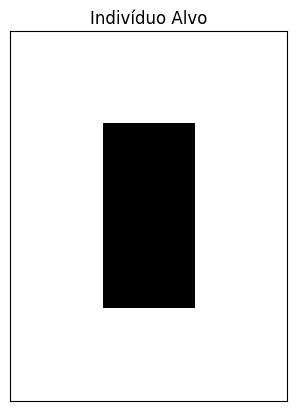

In [ ]:
# Visualiza indivíduo alvo

image = TARGET.reshape(4, 3)

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray', vmin=0, vmax=1)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title("Indivíduo Alvo")

plt.show()

### Execução Algoritmo Genético

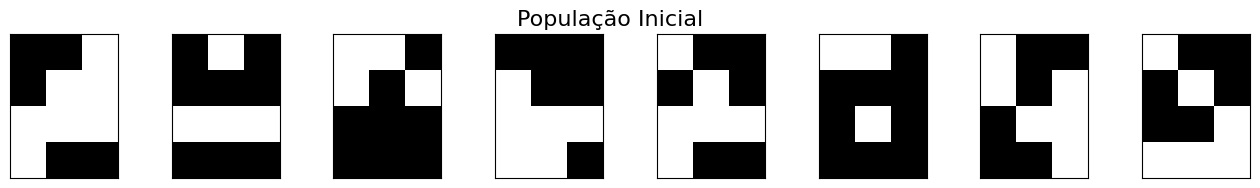

Encontrado em 70 gerações.


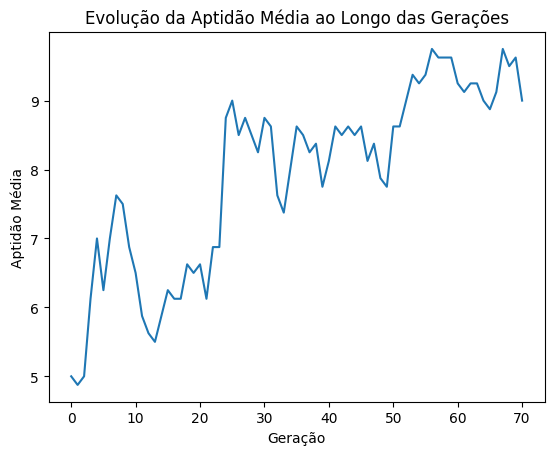

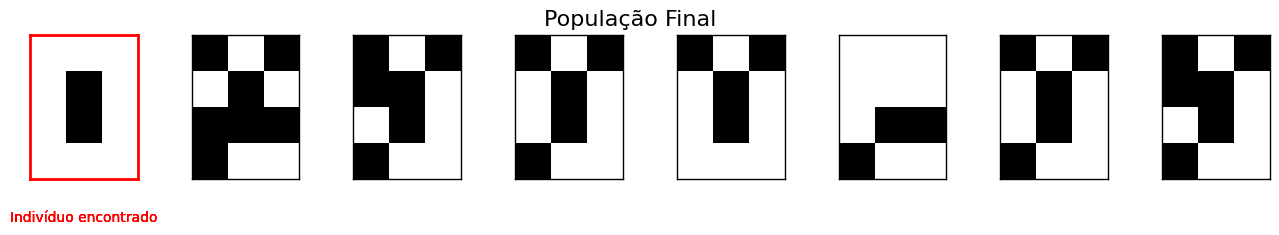

In [ ]:
# Gera população de forma aletória ou utiliza população previamente definida
population = generate_initial_population(random=False)

# Mostra a população inicial
plot_population(population)

# Executa o algoritmo genético e retorna a população final, número total de gerações e histórico de apitidão média
final_population, total_generations, average_fitness_history = genetic_algorithm(population, PC, PM)

# Mostra evolução da aptidão média ao longo das gerações
visualize_fitness_evolution(total_generations, average_fitness_history)

# Mostra a população final com os alvos encontrados
plot_final_population(final_population)

### Verificar quantas gerações são necessárias em média para atingir o alvo

Número médio de gerações necessárias: 110.49


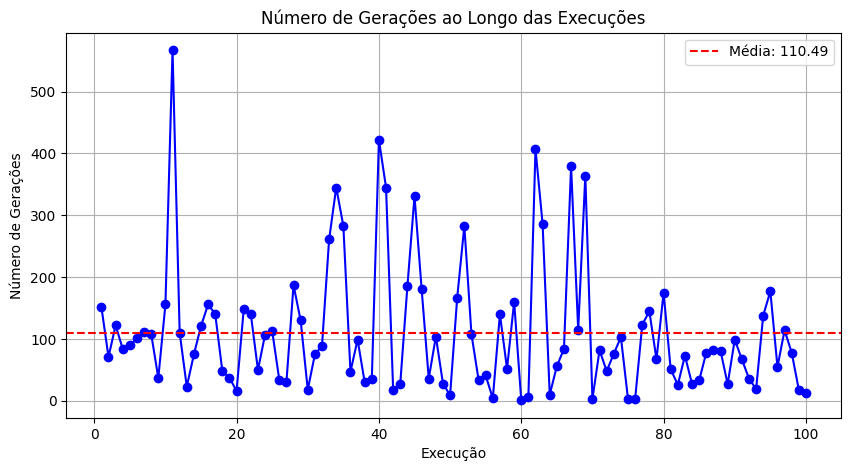

In [ ]:
# Número de execuções
num_executions = 100

# Lista para armazenar o número de gerações de cada execução
generations_needed_list = []

# Roda o algoritmo genético num_executions vezes
for _ in range(num_executions):
    final_population, total_generations, average_fitness_history = genetic_algorithm(population, PC, PM)
    generations_needed_list.append(total_generations)

# Calcula a média do número de gerações
average_generations_needed = np.mean(generations_needed_list)
print("Número médio de gerações necessárias:", average_generations_needed)

# Plota o gráfico dos números de geração ao longo das execuções
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_executions + 1), generations_needed_list, marker='o', linestyle='-', color='blue')
plt.axhline(y=average_generations_needed, color='red', linestyle='--', label=f'Média: {average_generations_needed:.2f}')
plt.xlabel('Execução')
plt.ylabel('Número de Gerações')
plt.title('Número de Gerações ao Longo das Execuções')
plt.grid(True)
plt.legend()
plt.show()

### Experimentos com diferentes valores de Crossover e Mutação

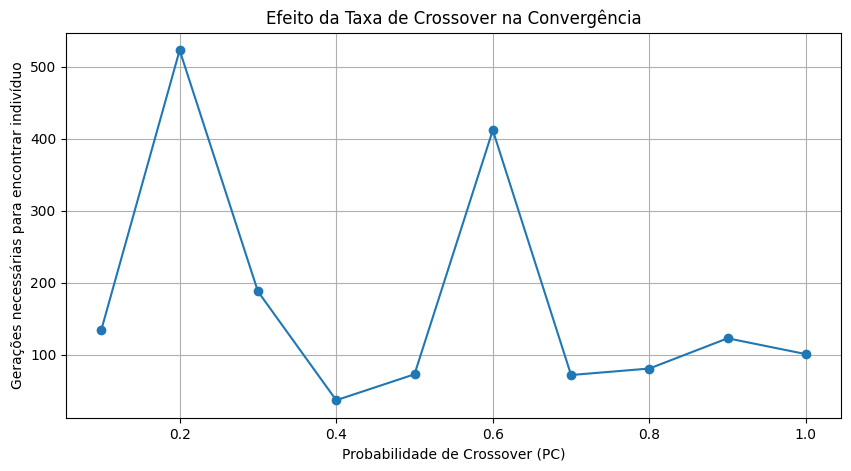

In [ ]:
pc_values = np.linspace(0.1, 1.0, 10)  # Diferentes valores de PC, de 0.1 até 1.0 em 10 etapas
generations_list = []
population = generate_initial_population(random=False)

for pc in pc_values:
  final_population, total_generations, average_fitness_history = genetic_algorithm(population, pc, PM)
  generations_list.append(total_generations)

# Visualiza Efeito da Taxa de Crossover na Convergência
plt.figure(figsize=(10, 5))
plt.plot(pc_values, generations_list, marker='o')
plt.xlabel('Probabilidade de Crossover (PC)')
plt.ylabel('Gerações necessárias para encontrar indivíduo')
plt.title('Efeito da Taxa de Crossover na Convergência')
plt.grid(True)
plt.show()

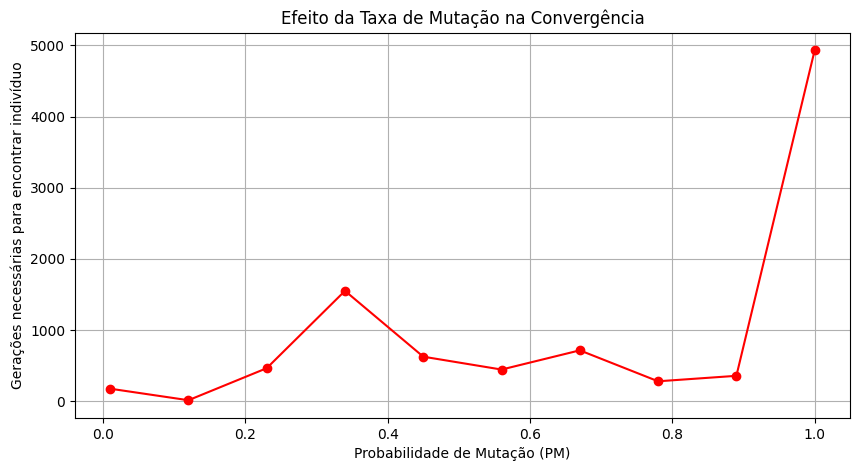

In [ ]:
pm_values = np.linspace(0.01, 1, 10)  # Diferentes valores de PC, de 0.1 até 1.0 em 10 etapas
generations_list = []
population = generate_initial_population(random=False)

for pm in pm_values:
  final_population, total_generations, average_fitness_history = genetic_algorithm(population, PC, pm)
  generations_list.append(total_generations)

# Visualiza Efeito da Taxa de Mutação na Convergência
plt.figure(figsize=(10, 5))
plt.plot(pm_values, generations_list, marker='o', color='red')
plt.xlabel('Probabilidade de Mutação (PM)')
plt.ylabel('Gerações necessárias para encontrar indivíduo')
plt.title('Efeito da Taxa de Mutação na Convergência')
plt.grid(True)
plt.show()

# 2. Algoritmo Genético para maximizar função

Implemente um Algoritmo Genético para maximizar a função (colocar função), já utilizada nos exercícios feitos em aula, dentro do intervalo [0 1]. Utilize uma representação de bitstring, com precisão suficiente para pelo menos 3 casas decimais. Considere o alvo como desconhecido e verifique quais os maiores valores obtidos para g(x). Compare os resultados obtidos com os resultados que você obteve com os algoritmos Subida da Colina e Recozimento Simulado aplicados a esta mesma função em relação aos valores obtidos para g(x) e tempos de execução. Aproveite para explorar diferentes formas de seleção, como roleta, torneio e amostragem universal estocástica.

### Bibliotecas utilizadas

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time

### Definição da função g(x)

In [ ]:
# Função a ser maximizada
def g(x):
    return 2 ** (-2 * (((x - 0.1) / 0.9) ** 2)) * (math.sin(5 * math.pi * x) ** 6)

### Funções para Seleção

In [ ]:
#Torneio
def tournament_selection(population, fitness_values, tournament_size):
    # Lista para armazenar os pais selecionados para a próxima geração
    selected_parents = []

    # Repete o processo de seleção para cada membro da população
    for _ in range(len(population)):
        # Escolhe aleatoriamente índices da população para formar um torneio
        tournament = random.sample(range(len(population)), tournament_size)

        # Vencedor do torneio: o indivíduo com o maior fitness
        # A função 'key' é usada para selecionar o índice com o maior valor de fitness
        winner = max(tournament, key=lambda i: fitness_values[i])

        # Adiciona o indivíduo vencedor à lista de pais selecionados
        selected_parents.append(population[winner])

    # Retorna a lista de pais selecionados após completar todos os torneios
    return selected_parents

In [ ]:
#Roleta
def roulette_wheel_selection(population, fitness_values):
    # Calcula o fitness total da população
    total_fitness = sum(fitness_values)

    # Calcula a probabilidade de seleção de cada indivíduo baseada em seu fitness
    selection_probs = [f / total_fitness for f in fitness_values]

    # Seleciona índices da população usando as probabilidades calculadas
    selected_indices = np.random.choice(len(population), size=len(population), p=selection_probs)

    # Cria uma nova população selecionada com base nos índices escolhidos
    selected_population = [population[i] for i in selected_indices]

    # Retorna a população selecionada
    return selected_population

In [ ]:
#Amostragem Universal Estocástica
def stochastic_universal_sampling(population, fitness_values):
    # Calcula o fitness total da população
    total_fitness = sum(fitness_values)

    # Calcula a probabilidade de seleção de cada indivíduo baseada em seu fitness
    selection_probs = [f / total_fitness for f in fitness_values]

    # Calcula espaços uniformes entre os ponteiros
    pointers = [random.uniform(0, 1 / len(population)) + i / len(population) for i in range(len(population))]

    current_member = 0
    current_sum = selection_probs[0]
    selected_population = []

    # Itera sobre cada ponteiro
    for pointer in pointers:
        # Avança para o próximo membro da população até que a soma acumulada dos pesos alcance o ponteiro
        while current_sum < pointer:
            current_member += 1
            current_sum += selection_probs[current_member]

        # Adiciona o membro atual à população selecionada
        selected_population.append(population[current_member])

    # Retorna a população selecionada
    return selected_population


### Representação bitstring

In [ ]:
# Função para converter uma bitstring em um número real no intervalo [0, 1]
def bitstring_to_float(bitstring):
    return int(bitstring, 2) / (2 ** len(bitstring) - 1)

### Operadores Genéticos

#### Crossover

In [ ]:
# Função de crossover de um ponto
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

#### Mutação

In [ ]:
# Função de mutação
def mutation(individual, mutation_rate):
    mutated_individual = ""
    for bit in individual:
        if random.random() < mutation_rate:
            mutated_bit = '0' if bit == '1' else '1'
            mutated_individual += mutated_bit
        else:
            mutated_individual += bit
    return mutated_individual

### Gerar população

In [ ]:
# Função para gerar uma população inicial
def generate_population(pop_size, bitstring_length):
    return ["".join(str(random.randint(0, 1)) for _ in range(bitstring_length)) for _ in range(pop_size)]

### Algoritmo Genético

In [ ]:
# Algoritmo Genético
def genetic_algorithm(population_size, bitstring_length, num_generations, tournament_size, crossover_rate, mutation_rate, selection_method):
    # Inicia o timer
    start_time = time.time()


    population = generate_population(population_size, bitstring_length)
    best_global_fitness = -float('inf')
    best_global_solution = None
    generation_of_best_solution = 0


    for generation in range(num_generations):

        fitness_values = [g(bitstring_to_float(individual)) for individual in population]

        # Verifica se foi encontrado uma nova melhor solução global
        max_fitness_in_gen = max(fitness_values)
        if max_fitness_in_gen > best_global_fitness:
            best_global_fitness = max_fitness_in_gen
            best_global_solution = population[fitness_values.index(max_fitness_in_gen)]
            generation_of_best_solution = generation

        # Seleção de pais
        if (selection_method == 'tournament'):
          selected_parents = tournament_selection(population, fitness_values, tournament_size)
        elif(selection_method == 'roulette'):
          selected_parents = roulette_wheel_selection(population, fitness_values)
        elif(selection_method == 'stochastic'):
          selected_parents = stochastic_universal_sampling(population, fitness_values)


        # Crossover
        children = []
        for i in range(0, population_size, 2):
            if random.random() < crossover_rate:
                child1, child2 = crossover(selected_parents[i], selected_parents[i + 1])
                children.extend([child1, child2])
            else:
                children.extend([selected_parents[i], selected_parents[i + 1]])

        # Mutação
        mutated_children = [mutation(child, mutation_rate) for child in children]

        # Nova população
        population = mutated_children

    # Encerra o timer
    end_time = time.time()

    # Calcula o tempo de execução
    execution_time = end_time - start_time



    return best_global_solution, best_global_fitness, generation_of_best_solution, execution_time


### Configurações iniciais e definição dos parâmetros

In [ ]:
# Parâmetros do Algoritmo Genético
BITSTRING_PRECISION = 20  # Ajuste conforme necessário para obter a precisão desejada
POPULATION_SIZE = 1000  # Tamanho da população
MAX_GENERATIONS = 100  # Número máximo de gerações
TOURNAMENT_SIZE = 5
PC = 0.8  # Taxa de crossover
PM = 0.01  # Taxa de mutação

### Execução do Algoritmo Genético e Resultados

### Explorando diferentes formas de seleção

Número médio de gerações necessárias: 5.85
Tempo médio de execução: 1.398349962234497


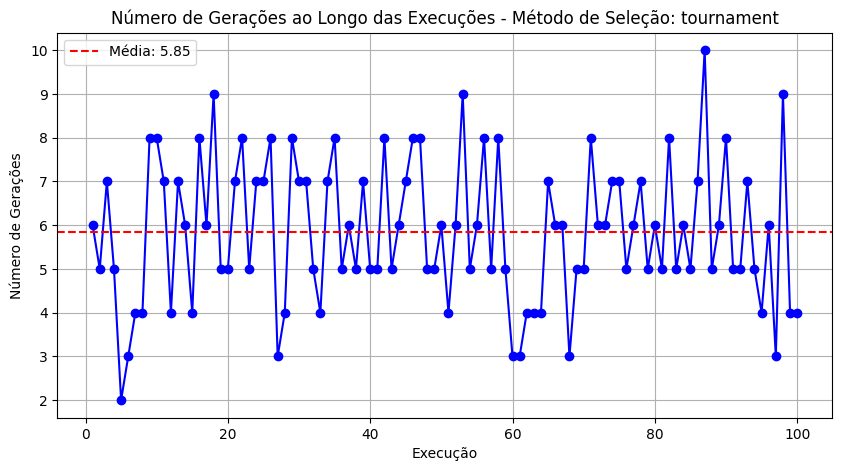

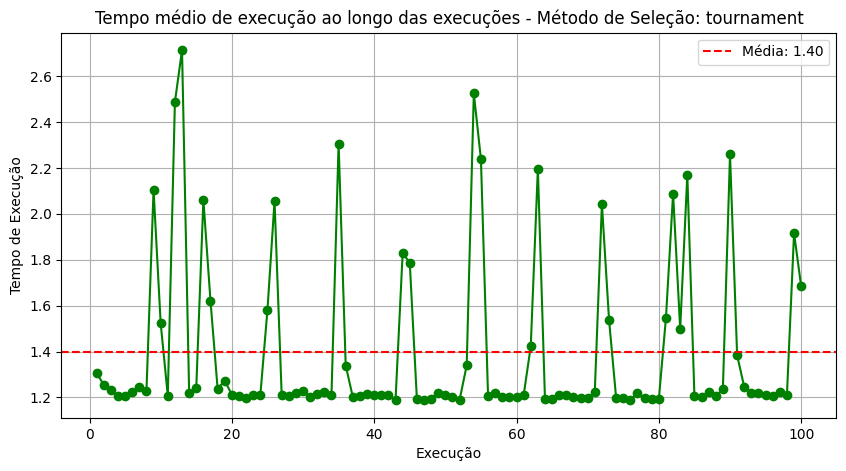

Número médio de gerações necessárias: 32.21
Tempo médio de execução: 0.7704941272735596


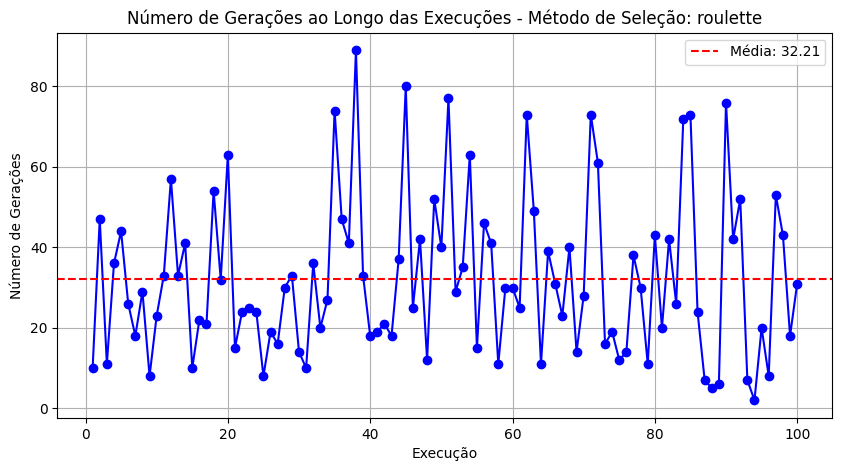

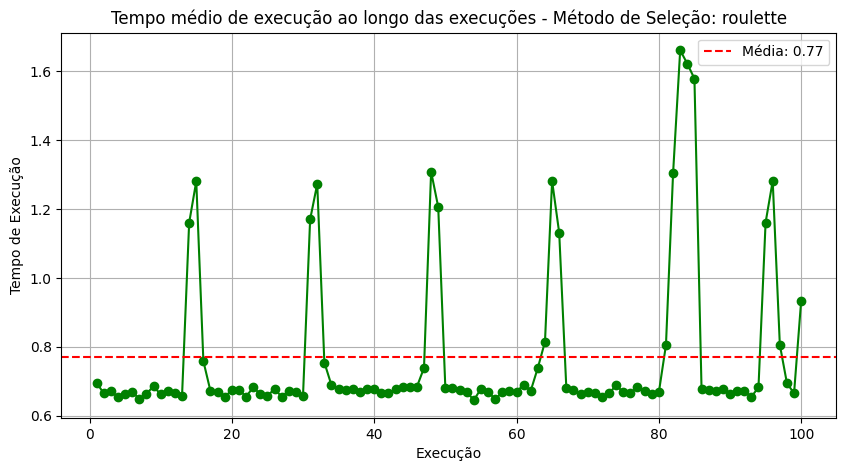

Número médio de gerações necessárias: 49.6
Tempo médio de execução: 0.8602712273597717


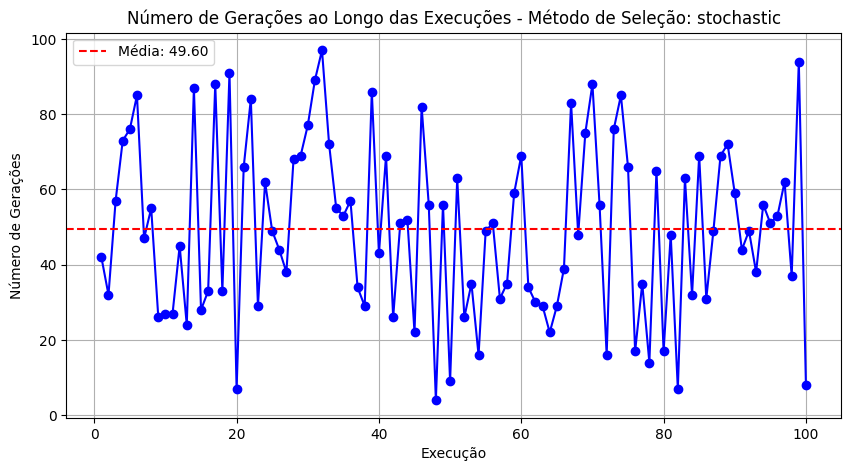

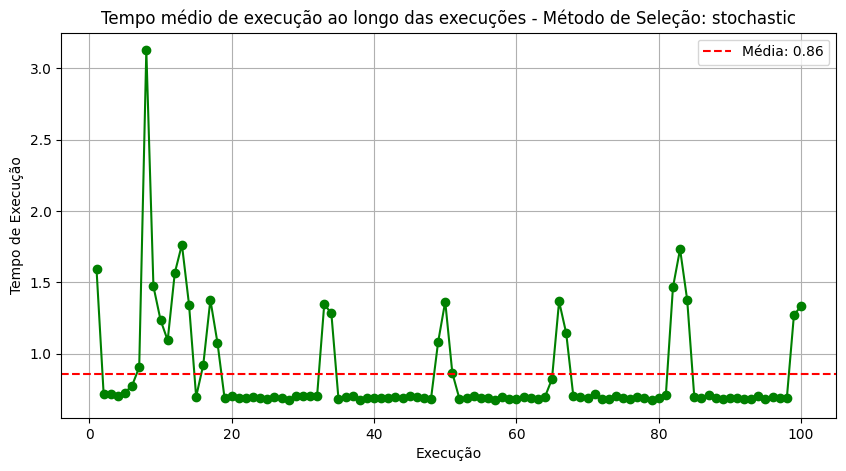

In [ ]:
# Métodos de seleção
selection_methods = ['tournament', 'roulette', 'stochastic']

# Número de execuções
num_executions = 100

# Lista para armazenar o número de gerações de cada execução
generations_needed_list = []

for selection_method in selection_methods:
  # Roda o algoritmo genético várias vezes
  generations_needed_list = []
  execution_time_list = []
  for _ in range(num_executions):
      # Execução do algoritmo genético
      best_solution, best_fitness, generation_of_best_solution, execution_time = genetic_algorithm(POPULATION_SIZE,
                                                                                  BITSTRING_PRECISION,
                                                                                  MAX_GENERATIONS,
                                                                                  TOURNAMENT_SIZE,
                                                                                  PC,
                                                                                  PM,
                                                                                  selection_method)
      generations_needed_list.append(generation_of_best_solution)
      execution_time_list.append(execution_time)

  # Calcula a média do número de gerações
  average_generations_needed = np.mean(generations_needed_list)
  print("Número médio de gerações necessárias:", average_generations_needed)

  # Calcula tempo médio de execução
  average_execution_time = np.mean(execution_time_list)
  print("Tempo médio de execução:", average_execution_time)

  # Plota o gráfico dos números de geração ao longo das execuções
  plt.figure(figsize=(10, 5))
  plt.plot(range(1, num_executions + 1), generations_needed_list, marker='o', linestyle='-', color='blue')
  plt.axhline(y=average_generations_needed, color='red', linestyle='--', label=f'Média: {average_generations_needed:.2f}')
  plt.xlabel('Execução')
  plt.ylabel('Número de Gerações')
  plt.title(f'Número de Gerações ao Longo das Execuções - Método de Seleção: {selection_method}')
  plt.grid(True)
  plt.legend()
  plt.show()

  # Plota o gráfico dos tempos de execução ao longo das execuções
  plt.figure(figsize=(10, 5))
  plt.plot(range(1, num_executions + 1), execution_time_list, marker='o', linestyle='-', color='green')
  plt.axhline(y=average_execution_time, color='red', linestyle='--', label=f'Média: {average_execution_time:.2f}')
  plt.xlabel('Execução')
  plt.ylabel('Tempo de Execução')
  plt.title(f'Tempo médio de execução ao longo das execuções - Método de Seleção: {selection_method}')
  plt.grid(True)
  plt.legend()
  plt.show()

### Comparando com os algoritmos Subida da Colina e Recozimento Simulado

In [ ]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Subida da Colina Iterativo

def hill_climbing_iterative(max_iter):
    # Inicialização
    current_solution = random.random()
    current_fitness = g(current_solution)

    # Iterações
    for _ in range(max_iter):
        # Geração da vizinhança
        neighbor = current_solution + random.uniform(-0.1, 0.1)
        neighbor = max(min(neighbor, 1), 0)  # Garante que o vizinho está dentro do intervalo [0, 1]

        # Avaliação do vizinho
        neighbor_fitness = g(neighbor)

        # Atualização se o vizinho for melhor
        if neighbor_fitness > current_fitness:
            current_solution = neighbor
            current_fitness = neighbor_fitness

    return current_solution


In [ ]:
# Subida da Colina Probabilistico

def hill_climbing_probabilistic(max_iter):
    # Inicialização
    current_solution = random.random()
    current_fitness = g(current_solution)

    # Iterações
    for _ in range(max_iter):
        # Geração da vizinhança
        neighbor = current_solution + random.uniform(-0.1, 0.1)
        neighbor = max(min(neighbor, 1), 0)  # Garante que o vizinho está dentro do intervalo [0, 1]

        # Avaliação do vizinho
        neighbor_fitness = g(neighbor)

        # Aceitação probabilística do vizinho
        if neighbor_fitness > current_fitness or random.random() < math.exp((neighbor_fitness - current_fitness) / max_iter):
            current_solution = neighbor
            current_fitness = neighbor_fitness

    return current_solution


In [ ]:
# Recozimento Simulado

def simulated_annealing(max_iter, initial_temperature):
    # Inicialização
    current_solution = random.random()
    current_fitness = g(current_solution)
    temperature = initial_temperature

    # Iterações
    for _ in range(max_iter):
        # Geração da vizinhança
        neighbor = current_solution + random.uniform(-0.1, 0.1)
        neighbor = max(min(neighbor, 1), 0)  # Garante que o vizinho está dentro do intervalo [0, 1]

        # Avaliação do vizinho
        neighbor_fitness = g(neighbor)

        # Aceitação probabilística do vizinho
        if neighbor_fitness > current_fitness or random.random() < math.exp((neighbor_fitness - current_fitness) / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

        # Atualização da temperatura
        temperature *= 0.99  # Redução exponencial da temperatura

    return current_solution


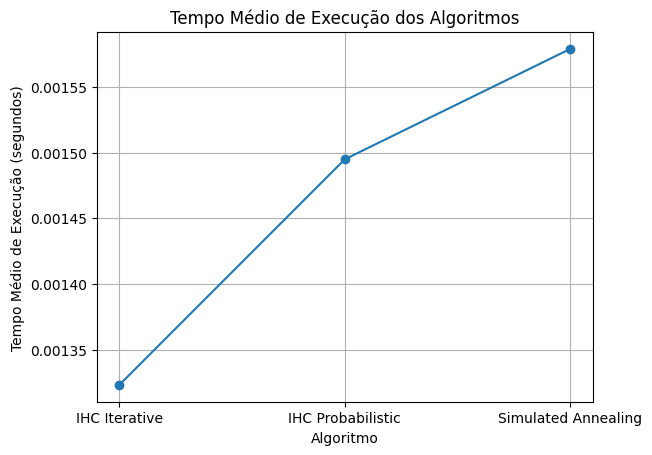

In [ ]:
#Função alvo
def g(x):
    return 2**(-2*(((x-0.1)/0.9)**2))*(math.sin(5*math.pi*x)**6)

#Parâmetros
max_iter = 1000  # Número máximo de iterações para cada algoritmo
num_executions = 100  # Número de execuções para calcular o tempo médio de execução

# istas para armazenar os tempos médios de execução
avg_execution_time_iterative = []
avg_execution_time_probabilistic = []
avg_execution_time_simulated_annealing = []

#Executa cada algoritmo num_executions vezes
for _ in range(num_executions):
    # IHC Iterativo
    start_time = time.time()
    hill_climbing_iterative(max_iter)
    end_time = time.time()
    avg_execution_time_iterative.append(end_time - start_time)

    # IHC Probabilístico
    start_time = time.time()
    hill_climbing_probabilistic(max_iter)
    end_time = time.time()
    avg_execution_time_probabilistic.append(end_time - start_time)

    # Recozimento Simulado
    start_time = time.time()
    simulated_annealing(max_iter, initial_temperature=10.0)
    end_time = time.time()
    avg_execution_time_simulated_annealing.append(end_time - start_time)

#Calcula os tempos médios de execução
avg_execution_time_iterative = np.mean(avg_execution_time_iterative)
avg_execution_time_probabilistic = np.mean(avg_execution_time_probabilistic)
avg_execution_time_simulated_annealing = np.mean(avg_execution_time_simulated_annealing)

#Plota o tempo médio de execução para cada algoritmo
plt.plot(['IHC Iterativi', 'IHC Probabilistic', 'Simulated Annealing'], [avg_execution_time_iterative, avg_execution_time_probabilistic, avg_execution_time_simulated_annealing], marker='o')
plt.xlabel('Algoritmo')
plt.ylabel('Tempo Médio de Execução (segundos)')
plt.title('Tempo Médio de Execução dos Algoritmos')
plt.grid(True)
plt.show()


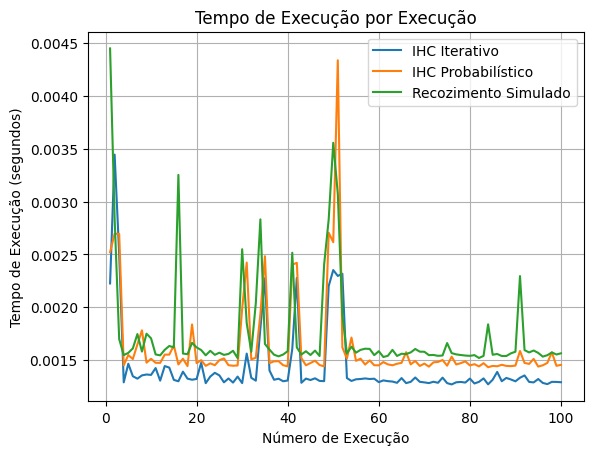

In [ ]:
#Listas para armazenar os tempos de execução para cada execução
execution_times_iterative = []
execution_times_probabilistic = []
execution_times_simulated_annealing = []

#Executa cada algoritmo num_executions vezes
for _ in range(num_executions):
    # IHC Iterativo
    start_time = time.time()
    hill_climbing_iterative(max_iter)
    end_time = time.time()
    execution_times_iterative.append(end_time - start_time)

    # IHC Probabilístico
    start_time = time.time()
    hill_climbing_probabilistic(max_iter)
    end_time = time.time()
    execution_times_probabilistic.append(end_time - start_time)

    # Recozimento Simulado
    start_time = time.time()
    simulated_annealing(max_iter, initial_temperature=10.0)
    end_time = time.time()
    execution_times_simulated_annealing.append(end_time - start_time)

# Tempos de execução para cada execução
plt.plot(range(1, num_executions + 1), execution_times_iterative, label='IHC Iterativo')
plt.plot(range(1, num_executions + 1), execution_times_probabilistic, label='IHC Probabilístico')
plt.plot(range(1, num_executions + 1), execution_times_simulated_annealing, label='Recozimento Simulado')
plt.xlabel('Número de Execução')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Tempo de Execução por Execução')
plt.legend()
plt.grid(True)
plt.show()


# 3. Algoritmo Genético para minimizar função

Utilize um Algoritmo Genético para minimizar a seguinte função no intervalo contínuo
[−10 +10
−10 +10]:

f(x, y) = (1 − x)^2 + 100(y − x^2)^2

Considere o alvo como desconhecido e verifique quais os menores valores obtidos
para f(x, y). Aproveite para testar diferentes tamanhos de população, sem elitismo e
com elitismo com diferentes quantidades de indivíduos.


### Bibliotecas utilizadas

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Definição da função f(x,y)

In [ ]:
# Função a ser minimizada (Função de Rosenbrock)
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

### Cálculo da aptidão

In [ ]:
# Função de fitness (para minimização)
def fitness(individual):
    x, y = individual
    return -f(x, y)

### Gerar população inicial

In [ ]:
# Geração inicial da população
def generate_population(pop_size, bounds):
    return [(random.uniform(*bounds), random.uniform(*bounds)) for _ in range(pop_size)]

### Operadores Genéticos

#### Crossover

In [ ]:
# Crossover (combinação linear)
def crossover(parent1, parent2, cr):
    if random.random() < cr:
        alpha = random.random()
        child1 = (alpha * parent1[0] + (1 - alpha) * parent2[0], alpha * parent1[1] + (1 - alpha) * parent2[1])
        child2 = ((1 - alpha) * parent1[0] + alpha * parent2[0], (1 - alpha) * parent1[1] + alpha * parent2[1])
        return child1, child2
    else:
        return parent1, parent2

### Mutação

In [ ]:
# Mutação
def mutation(individual, mutation_rate, bounds):
    x, y = individual
    if random.random() < mutation_rate:
        x += np.random.normal(0, (bounds[1] - bounds[0]) * 0.1)
        y += np.random.normal(0, (bounds[1] - bounds[0]) * 0.1)
        x = min(max(x, bounds[0]), bounds[1])  # Mantém dentro dos limites
        y = min(max(y, bounds[0]), bounds[1])  # Mantém dentro dos limites
    return x, y

### Seleção / Elistismo

In [ ]:
# Seleção de pais (Torneio)
def select_parents(population, fitness_values):
    tournament_size = 5
    tournament_selection = lambda: random.sample(population, tournament_size)
    parent1 = max(tournament_selection(), key=fitness)
    parent2 = max(tournament_selection(), key=fitness)
    return parent1, parent2

In [ ]:
# Implementação de elitismo
def implement_elitism(population, fitness_values, elite_count):
    sorted_population = sorted(zip(fitness_values, population), key=lambda pair: pair[0], reverse=True)
    elites = [individual for _, individual in sorted_population[:elite_count]]
    return elites

### Algoritmo Genético

In [ ]:
# Algoritmo genético
def genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, elitism, elite_count, bounds):
    population = generate_population(pop_size, bounds)
    best_individual = None
    best_fitness = float('-inf')
    fitness_history = []
    generation_found = 0  # Iniciar a contagem de gerações

    for generation in range(num_generations):
        population_fitness = [fitness(ind) for ind in population]
        elites = implement_elitism(population, population_fitness, elite_count) if elitism else []

        new_population = elites[:]
        while len(new_population) < pop_size:
            parent1, parent2 = select_parents(population, population_fitness)
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            child1 = mutation(child1, mutation_rate, bounds)
            child2 = mutation(child2, mutation_rate, bounds)
            new_population.extend([child1, child2])

        population = new_population[:pop_size]
        current_best_fitness = max(population_fitness)
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_individual = population[population_fitness.index(best_fitness)]
            generation_found = generation  # Atualiza quando um novo melhor fitness é encontrado

    return best_individual, -best_fitness, generation_found  # Retorna a geração do melhor fitness




### Configuração inicial e definição de parâmetros

In [ ]:
# Configuração dos parâmetros
pop_sizes = [20, 40, 60, 80, 100]
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.01
bounds = (-2, 2)  # Limites para os valores de x e y ajustados para proximidade do mínimo global
elite_count = 2  # Número de elites mantidas a cada geração
num_executions = 100  # Número de execuções para cada configuração de tamanho de população


### Execução do algoritmo e Resultados

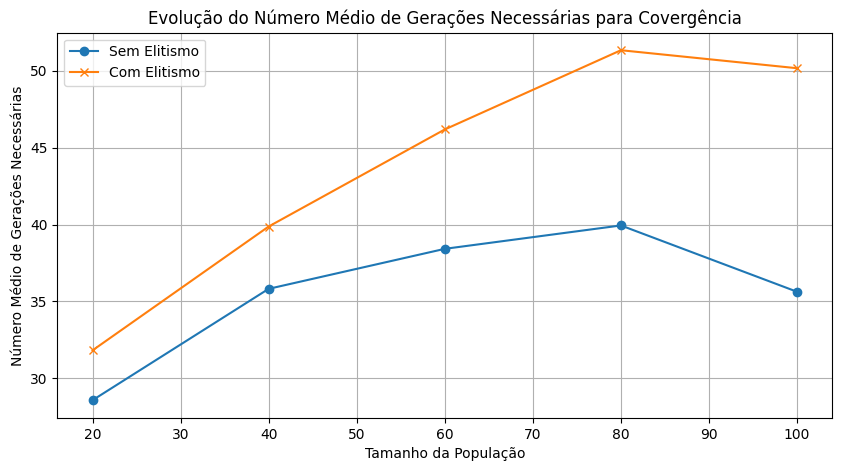

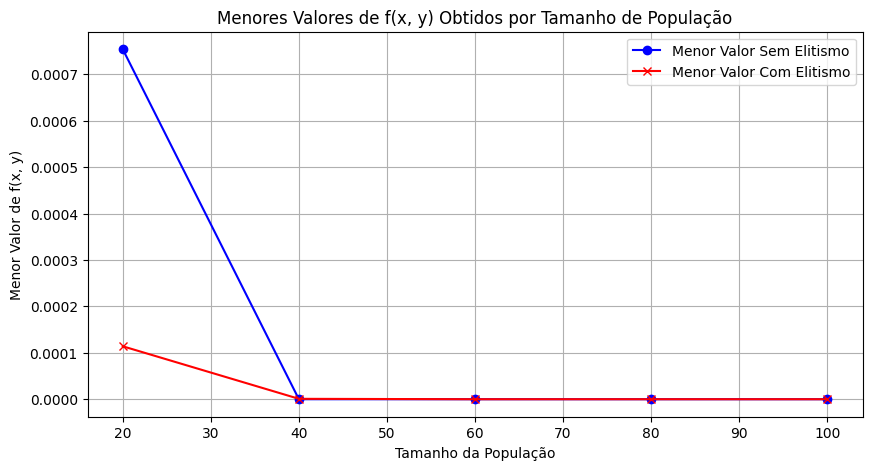

In [ ]:
# Resultados
avg_generations_no_elitism = []
avg_generations_with_elitism = []
min_values_no_elitism = []
min_values_with_elitism = []

# Execução do algoritmo genético para cada tamanho de população com e sem elitismo
for pop_size in pop_sizes:
    generations_no_elitism = []
    generations_with_elitism = []
    values_no_elitism = []
    values_with_elitism = []

    for _ in range(num_executions):
        _, value, generations = genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, False, elite_count, bounds)
        generations_no_elitism.append(generations)  # Adiciona o número da geração
        values_no_elitism.append(value)

        _, value, generations = genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, True, elite_count, bounds)
        generations_with_elitism.append(generations)
        values_with_elitism.append(value)

    avg_generations_no_elitism.append(sum(generations_no_elitism) / num_executions)
    avg_generations_with_elitism.append(sum(generations_with_elitism) / num_executions)
    min_values_no_elitism.append(min(values_no_elitism))
    min_values_with_elitism.append(min(values_with_elitism))

#Evolução do Número Médio de Gerações Necessárias
plt.figure(figsize=(10, 5))
plt.plot(pop_sizes, avg_generations_no_elitism, 'o-', label='Sem Elitismo')
plt.plot(pop_sizes, avg_generations_with_elitism, 'x-', label='Com Elitismo')
plt.xlabel('Tamanho da População')
plt.ylabel('Número Médio de Gerações Necessárias')
plt.title('Evolução do Número Médio de Gerações Necessárias para Covergência')
plt.legend()
plt.grid(True)
plt.show()


#Menores Valores de f(x, y) Obtidos por Tamanho de População
plt.figure(figsize=(10, 5))
plt.plot(pop_sizes, min_values_no_elitism, 'o-', color='blue', label='Menor Valor Sem Elitismo')
plt.plot(pop_sizes, min_values_with_elitism, 'x-', color='red', label='Menor Valor Com Elitismo')
plt.xlabel('Tamanho da População')
plt.ylabel('Menor Valor de f(x, y)')
plt.title('Menores Valores de f(x, y) Obtidos por Tamanho de População')
plt.legend()
plt.grid(True)
plt.show()